# Expectation Maximization for Gaussian Distribution
Note: Have patience!!! the log likelihood graph will come at the end & takes some time!
Restart the kernel if needed.

In [11]:
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
import numpy as np
from scipy.stats import multivariate_normal
import pandas as pd
from sklearn.model_selection import train_test_split
from numpy import linalg as LA
import sklearn

In [12]:
#read our dataset
n_samples=1000
col_names=['x']
df = pd.read_csv("A2Q1.csv",names=col_names)
df.head(n=5)

#show the distribution of the data as a histogram
data = df.x
X = data
data

0       0.57539
1       7.69890
2       5.17310
3       1.00350
4       0.21469
         ...   
995    39.90800
996     2.77390
997     4.18190
998    63.89000
999    11.66300
Name: x, Length: 1000, dtype: float64

In [13]:

#Step-1. Axis 0 indicates add the columns to calulate mean
mu1 =  np.mean(data[:250] , axis = 0)
print(mu1)
mu2 =  np.mean(data[250:500] , axis = 0)
print(mu2)
mu3 =  np.mean(data[500:750] , axis = 0)
print(mu3)
mu4 =  np.mean(data[750:1000] , axis = 0)
print(mu4)


#Standard devication calculation
import statistics
sigma1 = statistics.stdev(data[:250])
sigma2 = statistics.stdev(data[250:500])
sigma3 = statistics.stdev(data[500:750])
sigma4 = statistics.stdev(data[750:1000])
print()
print(sigma1)
print(sigma2)
print(sigma3)
print(sigma4)

np.random.shuffle(X)
#print("Dataset shape", X.shape)

7.9269065064
6.906553287200001
7.363639616672002
8.333211398960005

15.193916593588792
12.36933708596566
12.954630754843963
15.322216518202161


C:\Users\smaganah\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: UserWarning: `x` isn't a recognized object; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
eps = 1e-8
def gaussian_pdf(data, mean, variance):
    a1 = 1/((np.sqrt(2*np.pi*variance))+eps)
    a2 = np.exp(-(np.square(data - mean)/((2*variance)+eps)))
    return a1 * a2

[]

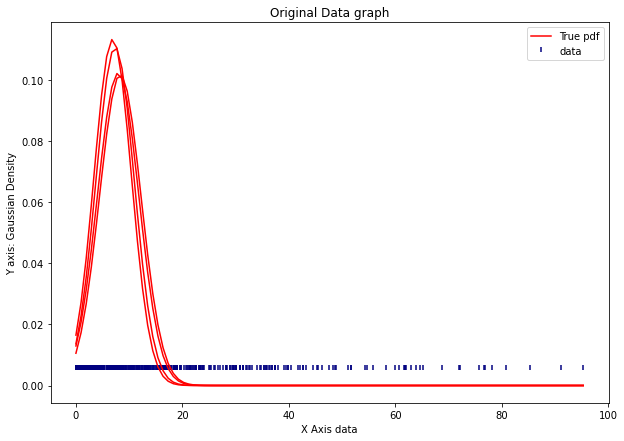

In [15]:
# visualize the training data
bins = np.linspace(np.min(X), np.max(X), 100)

plt.figure(figsize = (10,7))
plt.xlabel("X Axis data")
plt.ylabel("Y axis: Gaussian Density")
plt.title("Original Data graph")
plt.scatter(X, [0.005] * len(X), color='navy', s=30, marker=2, label="data")


#plot the gaussian curve
plt.plot(bins, gaussian_pdf(bins, mu1, sigma1), color='r', label="True pdf")
plt.plot(bins, gaussian_pdf(bins, mu2, sigma2), color='r')
plt.plot(bins, gaussian_pdf(bins, mu3, sigma3), color='r')
plt.plot(bins, gaussian_pdf(bins, mu4, sigma4), color='r')
plt.legend()
plt.plot()

In [16]:
# define the number of clusters to be learned
a=4
b=5
k=4
mixture_prob = np.ones((k))/(k+eps)
means = np.random.beta(a, b, k)
variances = np.random.random_sample(size=k)
print(means, variances)

[0.30325796 0.36453141 0.46733553 0.39474161] [0.44837355 0.14468704 0.61429021 0.37508509]


In [17]:
def log_likelihood(X, k, pi, mu, sigma):
    ll = []
    tot = 0
    for i in range(k):
        tot += pi[i] * gaussian_pdf(X, mu[i], sigma[i])
        ll.append(np.log(tot))
    return np.sum(ll)

C:\Users\smaganah\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


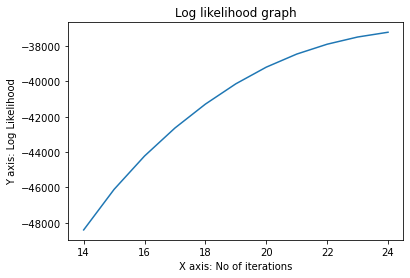

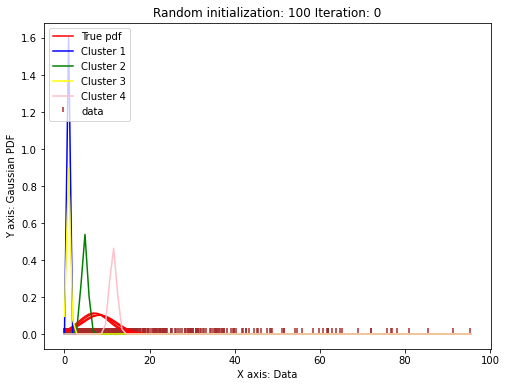

C:\Users\smaganah\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


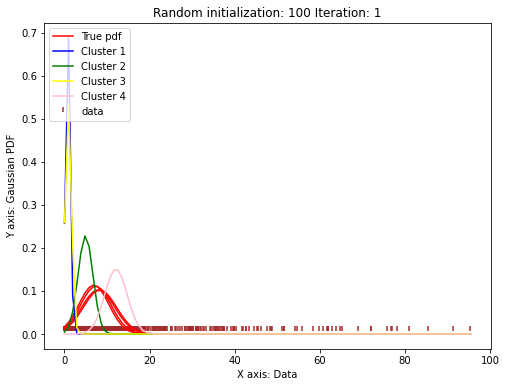

C:\Users\smaganah\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


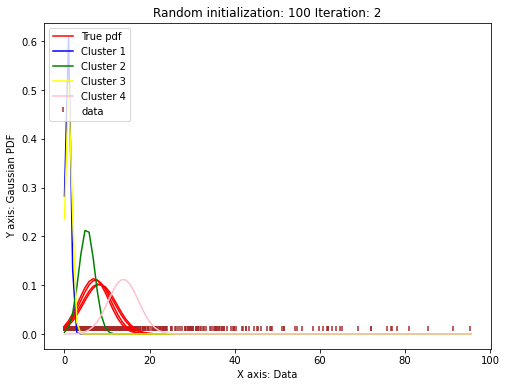

C:\Users\smaganah\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


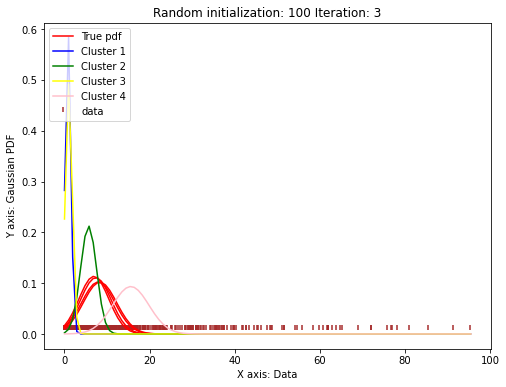

C:\Users\smaganah\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


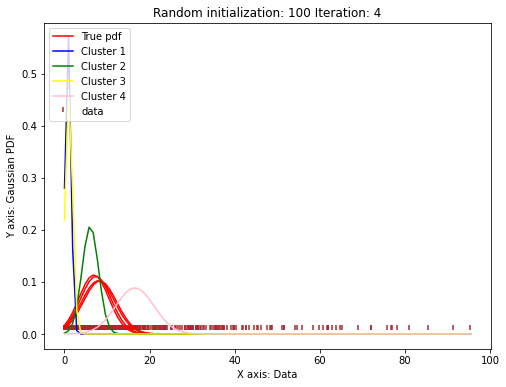

C:\Users\smaganah\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


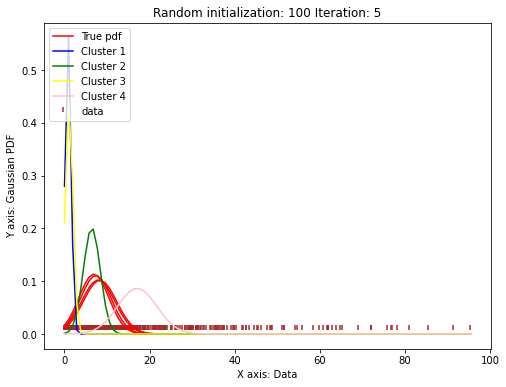

C:\Users\smaganah\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


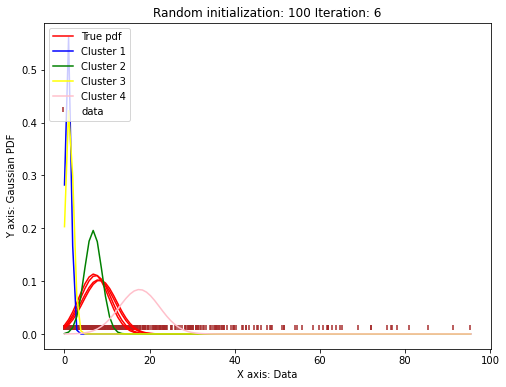

C:\Users\smaganah\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


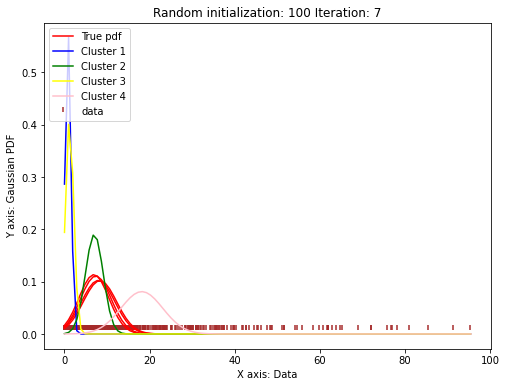

C:\Users\smaganah\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


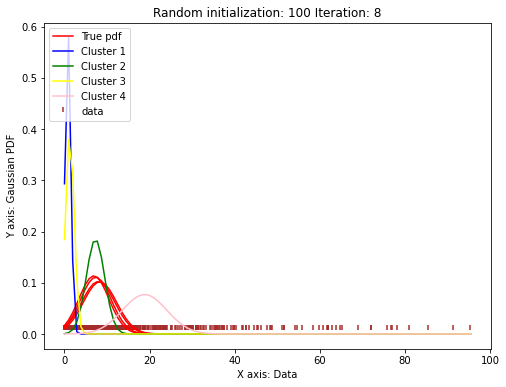

C:\Users\smaganah\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


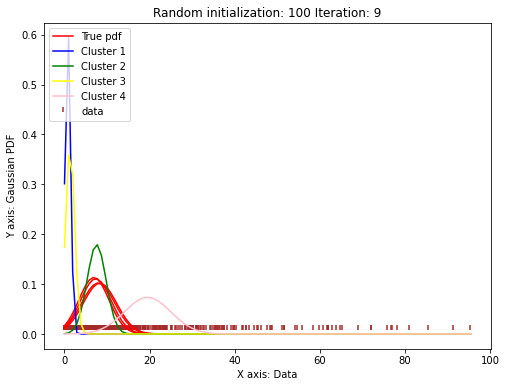

C:\Users\smaganah\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


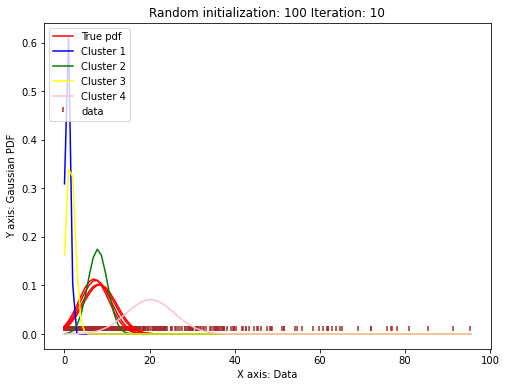

C:\Users\smaganah\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


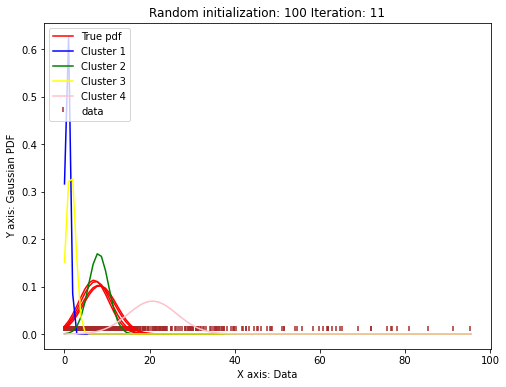

C:\Users\smaganah\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


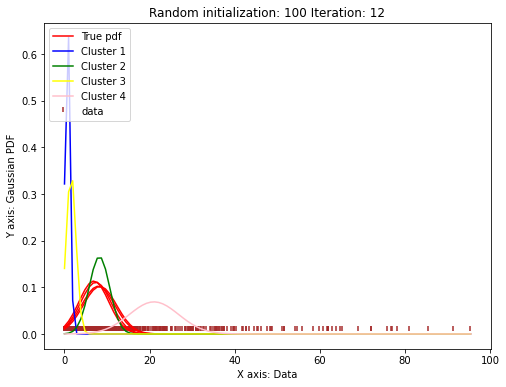

C:\Users\smaganah\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


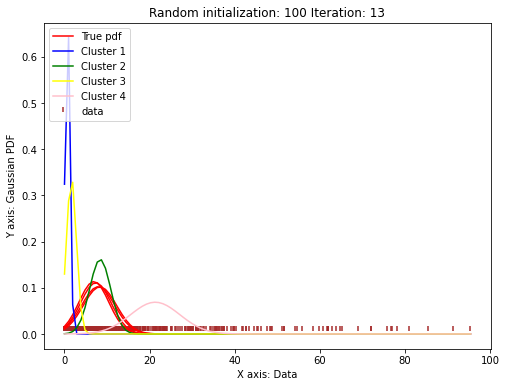

C:\Users\smaganah\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


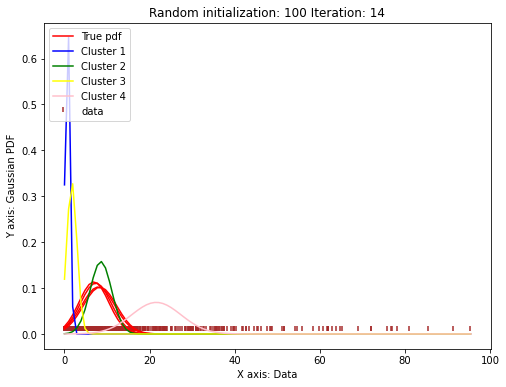

C:\Users\smaganah\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


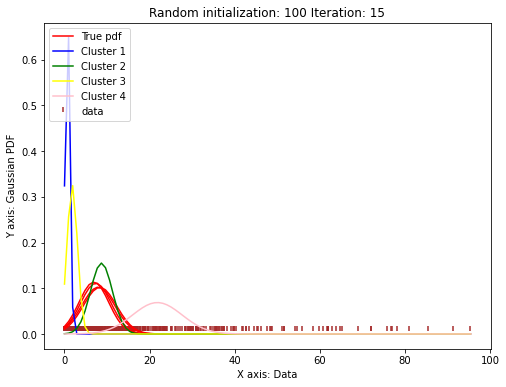

C:\Users\smaganah\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


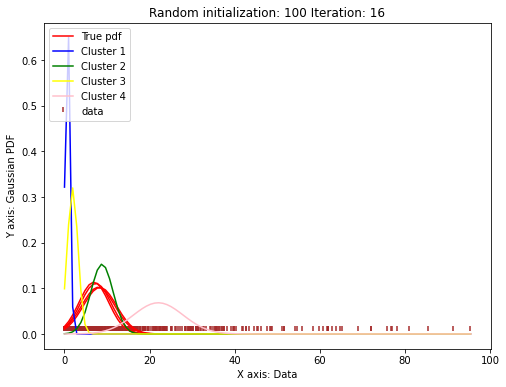

C:\Users\smaganah\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


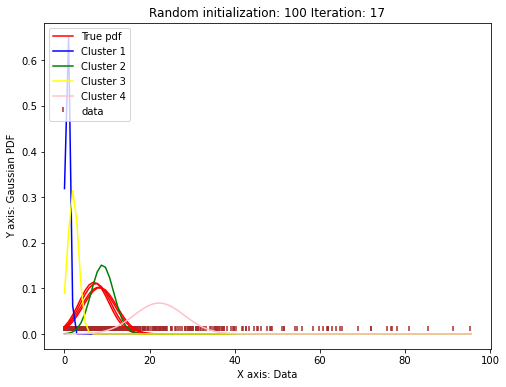

C:\Users\smaganah\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


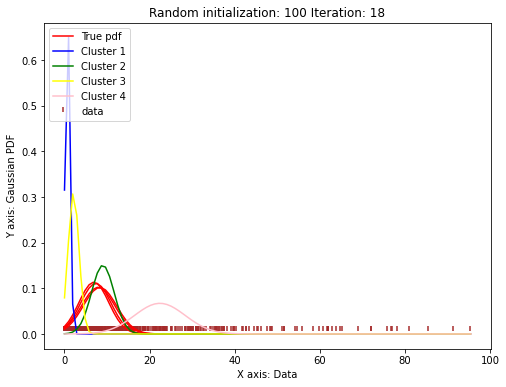

C:\Users\smaganah\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


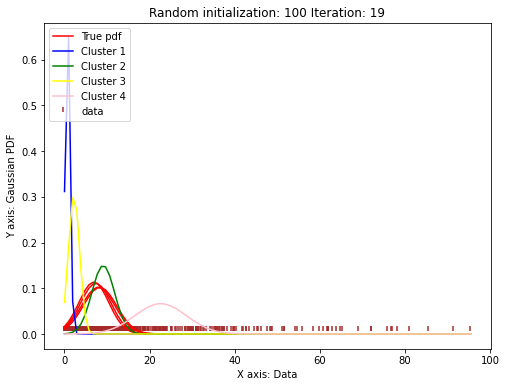

C:\Users\smaganah\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


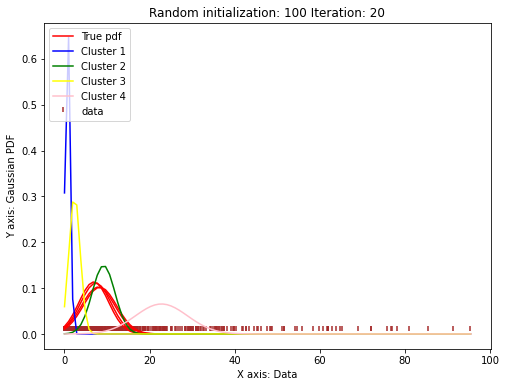

C:\Users\smaganah\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


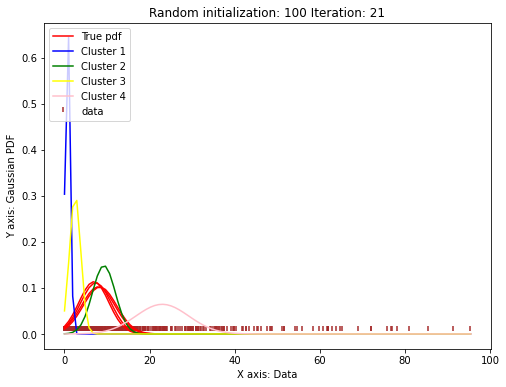

C:\Users\smaganah\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


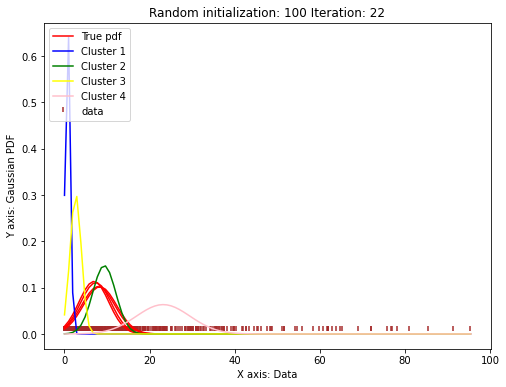

C:\Users\smaganah\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


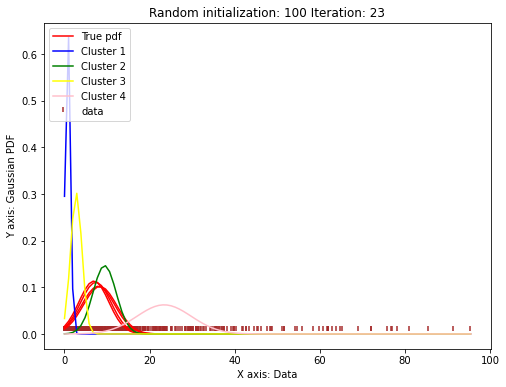

C:\Users\smaganah\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


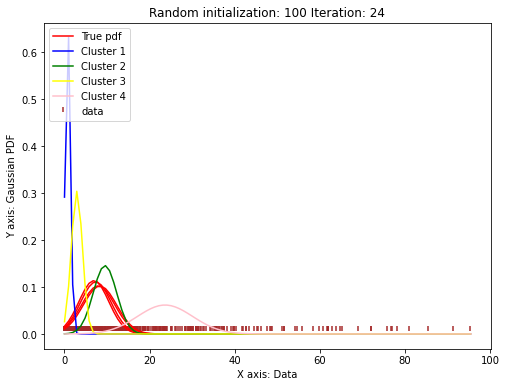

C:\Users\smaganah\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


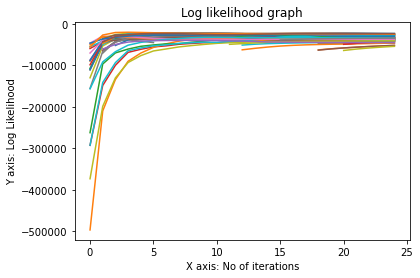

In [18]:
eps = 1e-8
z = np.empty((0,1000), int)

#Trying for 100 random initializations
o_it = 100
for i in range(o_it):
    log_liklihood = []
    k=4
    mixture_prob = np.ones((k))/(k+eps)
    means = np.random.choice(X,k)
    variances = np.random.random_sample(size=k)

    #After 25 iterations it will converge
    for it in range(25):
        #Uncomment below if to get all iteration plots
        #if 1
        if (i*o_it) % 99 == 1:
            plt.figure(figsize=(8,6))
            axes = plt.gca()
            plt.xlabel("X axis: Data")
            plt.ylabel("Y axis: Gaussian PDF")
            plt.title("Random initialization: {} Iteration: {}".format(o_it, it))
            plt.scatter(X, [0.007] * len(X), color="brown", s=30, marker=2, label="data")

            plt.plot(bins, gaussian_pdf(bins, mu1, sigma1), color='Red', label="True pdf")
            plt.plot(bins, gaussian_pdf(bins, mu2, sigma2), color='Red')
            plt.plot(bins, gaussian_pdf(bins, mu3, sigma3), color='Red')
            plt.plot(bins, gaussian_pdf(bins, mu4, sigma4), color='Red')
        
            plt.plot(bins, gaussian_pdf(bins, means[0], variances[0]), color='blue', label = 'Cluster 1')
            plt.plot(bins, gaussian_pdf(bins, means[1], variances[1]), color='green', label = 'Cluster 2')
            plt.plot(bins, gaussian_pdf(bins, means[2], variances[2]), color='yellow', label = 'Cluster 3')
            plt.plot(bins, gaussian_pdf(bins, means[3], variances[3]), color='pink', label = 'Cluster 4')

            plt.legend(loc='upper left')
            plt.show()
        
        # calculate the density of each data point
        density = []
        
        # E-Step
        for j in range(k):
            density.append(gaussian_pdf(X, means[j], np.sqrt(variances[j])))
            
        density = np.array(density)

        resp = []
        for j in range(k):
            resp.append((density[j]*mixture_prob[j])/(np.sum([density[i]*mixture_prob[i] for i in range(k)],axis=0)+eps))
                
        # M-Step
        for j in range(k):

            #upgrade mean and variance
            means[j] = np.sum(resp[j] * X) / (np.sum(resp[j] + eps))
            variances[j] = np.sum(resp[j] * np.square(X - means[j])) / (np.sum(resp[j] + eps))
            
            #update the mixture probabilities
            mixture_prob[j] = np.mean(resp[j])
                
        ll = log_likelihood(X, k, mixture_prob, means, variances)
        # Computing log-likelihood
        log_liklihood.append(ll)

    plt.title("Log likelihood graph")
    plt.plot(range(25), log_liklihood)
    plt.xlabel("X axis: No of iterations")
    plt.ylabel("Y axis: Log Likelihood")
    
            
            
